# Lab 2 - Pandas och data processing

## Assignment summary
Vi hör mycket i media om att Sveriges PISA-resultat blir sämre och att svenska skolan tappar i kunskapsnivå. Låt oss
undersöka lite närmre hur det ser ut med hjälp av nationella prov i årskurs 9.
Skolverket har samlat mycket statistik kring nationella proven i årskurs 9 som vi kommer att analysera vidare.

### Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera matplotlib grafer
i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att referera till dem.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar mm.

### Uppgift 1
I den här uppgiften ska du visualisera med hjälp av matplotlib

a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena (engelska, matematik, svenska,
svenska som andraspråk). Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan.

b) För de olika ämnena, rita ett stapeldiagram på totala poängen för de olika huvudmännen. Placera alla diagram i en plott med subplottar

### Uppgift 2
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.

a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt, flickor och pojkar i samma graf.

b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

c) (bonus) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data
finns för läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.

___

### Assignment 1

##### Importing necessary libraries and modules

I start by importing all the necessary libraries and modules that I need further down in the code.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

##### Dataframe creation

Here I use pandas to create dataframes for each sheet/page in the excel-file, and store these in separate variables, followed by storing them in a list for easy iteration.

In [46]:
# Read the data from each sheet in the XLSX file and store in separate dataframes
df_eng = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name='Engelska', header=8)
df_sve = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name='Svenska', header=8)
df_sve_andra = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name='Svenska som andraspråk', header=8)
df_matte = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name='Matematik', header=8)

df_list = [df_eng, df_sve, df_sve_andra, df_matte]

##### Data cleaning

Next I iterate through the dataframes in the list I previously made, and replaces the column titles for more clarity. I also replace the ".." on one of the sheets with "0", and convert it to a number.

In [47]:
# Rename the columns in all the dataframes and replace ".." with "0" in the "Totalt (poäng)" column
for df in df_list:
    df.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)']
    df["Totalt (poäng)"] = df["Totalt (poäng)"].replace("..", "0")  # Replace ".." with "0"
    df["Totalt (poäng)"] = pd.to_numeric(df["Totalt (poäng)"], errors="coerce")  # Convert to number

# Display the contents of the dataframe with index 0 (to see that everything is correct)
df_list[0]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


---

##### Plotting

After I had made sure the dataframes look as intended I created a figure with subplots per sheet from the excel file. I improved clarity and comparability by adjusting the subplots and axes.

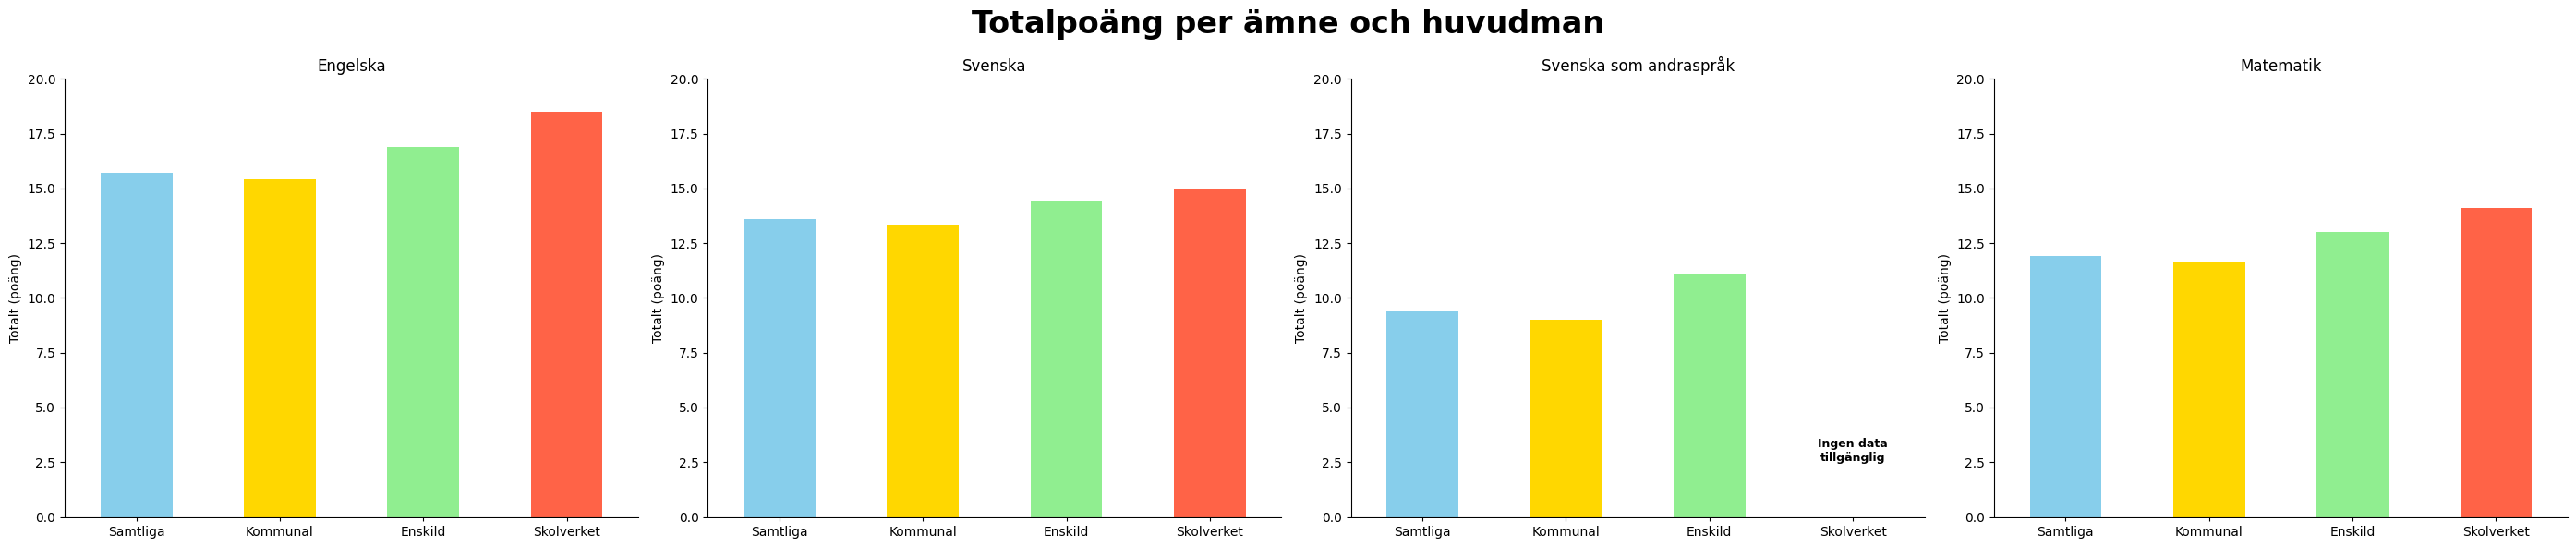

In [48]:
# Subject names for titles for the subplots
subject_titles = ["Engelska", "Svenska", "Svenska som andraspråk", "Matematik"]

# Create a figure with 1 row and 4 columns of subplots
fig, axes = plt.subplots(1, 4, figsize=(len(df_list)*7, 6)) # Tip from Andreas to use len(df_list) to make the figure width dynamic

# Loop through each dataframe and plot in the corresponding subplot
for i, df in enumerate(df_list):
    df.plot(
        x='Huvudman', 
        y='Totalt (poäng)', 
        kind='bar', 
        ax=axes[i], 
        legend=False,  # Hide legend
        color=['skyblue', 'gold', 'lightgreen', 'tomato']  # Set color palette
    )
    
    axes[i].set_title(subject_titles[i])  # Set title for each subplot based on the subject_titles list
    axes[i].set_ylabel("Totalt (poäng)")  # Label for the y-axis
    axes[i].set_xlabel("")  # "Hide" x-axis label
    axes[i].set_ylim(0,20) # Set the y-axis limits to 0-20 so that the bars are comparable
    axes[i].spines[['top', 'right']].set_visible(False)  # Hide the top and right border
    # Rotate the x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=0)

fig.suptitle("Totalpoäng per ämne och huvudman", fontsize=24, fontweight = 'bold')

# Add annotation for the "Svenska som andrapspråk" subplot for the Skolverket bar since there is no data available/reported to them
axes[2].annotate('Ingen data\ntillgänglig',
                xy=(1, 2),
                xytext=(3, 3),
                fontsize=9, fontweight='bold', color='black',
                rotation=0, ha='center', va='center')


# Adjust layout to avoid overlapping
fig.tight_layout()

# Save the plot with all subplots as a png file
fig.savefig("visualiseringar/totalpoang_per_amne_och_huvudman.png", dpi=300, bbox_inches='tight')


---

### Assignment 2

##### Dataframe creation and cleaning

In [49]:
# Read the data from the relevant sheet (Tabell 1B) in the XLSX file and store in a dataframe
df_table_1b = pd.read_excel('data/betyg_o_prov_riksnivå.xlsx', sheet_name='Tabell 1B', header=7)

# I rename the Unnamed column to "År" to make it more readable
df_table_1b = df_table_1b.rename(columns={"Unnamed: 0": "År"})

# I only need the rows for years 2018-2023, so I filter out the rest
df_table_1b = df_table_1b.loc[0:4]

# I only need the first and the last three columns (column 8, 9 and 10), so I filter out the rest
df_missing_grades = df_table_1b.iloc[:, [0, 7, 8, 9]]

# I rename the columns to make them more readable
df_missing_grades = df_missing_grades.rename(columns={"Totalt.2": "Totalt",
                                                    "Flickor.2": "Flickor",
                                                    "Pojkar.2": "Pojkar"}
                                                    )

df_missing_grades # To check the values

,År,Totalt,Flickor,Pojkar
0,2018/19,24.5,21.7,27.2
1,2019/20,23.9,21.4,26.3
2,2020/21,23.9,21.9,25.9
3,2021/22,25.9,24.2,27.5
4,2022/23,26.8,25.5,28.0


##### Plotting (missing grades)

In [53]:
# Fig object to use with plotly express to create a line diagram
fig_missing_grades = px.line(
    df_missing_grades,
    x='År',
    y=['Flickor', 'Pojkar', 'Totalt'],
    title='Andel som saknar betyg i minst ett ämne',
    labels={'År': 'Årtal', 'value': 'Andel (%)', 'variable': 'Kategori'},
)

fig_missing_grades.show()

# Save the plot as a html file
fig_missing_grades.write_html("visualiseringar/andel_som_saknar_betyg_i_minst_ett_amne.html")

___

##### Plotting (merit value for 16 subjects)

In [52]:
# Here I need the same rows but other columns, so I reuse the dataframe df_table_1b
# Instead I need the first four columns, so I filter out the rest
df_merit_16 = df_table_1b.iloc[:, :4]

# Fig object to use with plotly express to create a line diagram
fig_merit_16 = px.line(
    df_merit_16,
    x='År',
    y=['Flickor', 'Pojkar', 'Totalt'],
    title='Meritvärde per kategori och år (16 ämnen)',
    labels={'År': 'Årtal', 'value': 'Poäng i meritvärde', 'variable': 'Kategori'},
)

fig_merit_16.show()

# Save the plot as a html file
fig_merit_16.write_html("visualiseringar/meritvarde_16.html")

___